Question 1: Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of linear threshold units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

 A classical perceptron will only converge if the data is linearly seperable. It also cannot compute class probabilities. The logistic regression classifier is able to converge on non-linear data and outputs class probabilities.

If you want to tweak the Perceptron to make it like a logistic regression classifier you can do so by changing the activation function to the softmax or the sigmoid function and train it using gradient descent, or some other optimization algorithm.



Question 2: Why was the logistic activation function a key ingredient in training the first MLPs?

The logistic activation function is smooth at all points. Therefore, its derivative is always non-zero. This allows gradient descent to find smaller values of theta after each iteration. When the activation function is a step function, gradient descent cannot move at all because there is no slope

Question 3: Name three popular activation functions. Can you draw them?

Three Popular Activation Funnctions are:

ReLu

<img src = "image11.png">

Tanh

<img src = "image12.png">

ELU

<img src = "image 13.png" >

Question 4: Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

•	What is the shape of the input matrix X?

The shape of X will be (m x 10) where m is the batch size. The logic of a passthrough neuron is that it should have no effect at all on the input layer. Therefore, there must be one neuron for each input feature that allows the input feature to pass through to the next layer without altering its value in any way.

•	What about the shape of the hidden layer’s weight vector Wh, and the shape of its bias vector bh?

Since the hidden layer has 50 neurons and there are 10 features, its weight vector will have the shape of 10 x 50. Because each of the 10 features will need to be multiplied by a weight which is connected to each of the 50 hidden layer neurons.

The bias vector will have a length of 50. This is because one bias unit is added to the output of the passthrough layer. That unit is then multiplied once for each of the 50 artificial neurons.

•	What is the shape of the output layer’s weight vector Wo, and its bias vector bo?

The output layer has 3 neurons. The input to the output layer is the output of the hidden layer.The output of the hidden layer has 50 neurons, therefore the shape of the output layer's weight vector is 50 x 3.

The bias vector will have a length of 3 because one bias unit is added to the output of the hidden layer. That unit is then multiplied once for each of the 3 neurons in the output layer.

•	What is the shape of the network’s output matrix Y?

The shape of the output matrix is going to be m x 3, where m is the batch size, and 3 because each example will compute a probability that it belongs to one of three classes

•	Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo and bo.

Y = (X * Wh + bh) * (Wo + bo)

When adding a bias vector to a matrix it is added to every single row. This is called broadcasting.

Question 5: How many neurons do you need in the output layer if you want to classify email into spam or not spam? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function?

Email classification is a binary classification problem, so you would only need one neuron in the output layer. This neuron would indicate the probability that the email is spam or not spam. You'd most likely use the sigmoid activation function in the output layer.

For the MNIST problem you would need 10 output neurons in the final layer, one for each digit. You would then replace the logistic function with the softmax function which can output one probability per class per digit.



Question 6: What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

Backpropagation is an algorithm used to train neural networks. It first computes the gradients of the cost function with regards to every model parameter then it performs a gradient descent step using these gradients.

This backpropagation step is performed until the model parameters converge to values that hopefully minimize the cost function.

Backpropagation refers to the whole process of training a neural network. Reverse-mode autodiff is a technique to compute the gradients efficiently. It is used by the backprop algorithm.

Question 7: Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

In general, the hyperparameters of a neural network you can adjust are the number of hidden layers, the number of neurons in each hidden layer, and the activation function used by each neuron.

For binary classification, use the logistic activation function. For a multi-class problem, use softmax. For a linear regression problem, don't use an activation function.

Some simple ways to try and solve overfitting are reducing the number of hidden layers or the number of neurons

Question 8: Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. 

In [35]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [36]:
#Loading the MNIST Dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

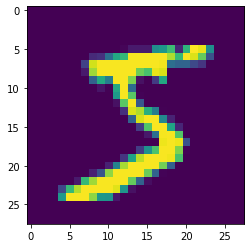

In [37]:
#Lets look at the image
plt.imshow(x_train[0])

In [38]:
# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

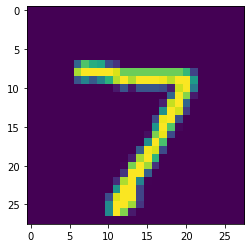

In [39]:
#Lets look at the image
plt.imshow(x_test[0])

In [40]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , channel = 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [41]:
x_train.shape

(60000, 28, 28, 1)

In [42]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)         

In [43]:
model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.fit(x_train,y_train,epochs = 10,batch_size = 100)

Epoch 1/10
600/600 [==============================] - 136s 224ms/step - loss: 0.2065 - accuracy: 0.9351
Epoch 2/10
600/600 [==============================] - 141s 235ms/step - loss: 0.0692 - accuracy: 0.9794
Epoch 3/10
600/600 [==============================] - 140s 233ms/step - loss: 0.0492 - accuracy: 0.9852
Epoch 4/10
600/600 [==============================] - 130s 217ms/step - loss: 0.0424 - accuracy: 0.9875
Epoch 5/10
600/600 [==============================] - 130s 216ms/step - loss: 0.0364 - accuracy: 0.9891
Epoch 6/10
600/600 [==============================] - 129s 215ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 7/10
600/600 [==============================] - 128s 214ms/step - loss: 0.0284 - accuracy: 0.9913
Epoch 8/10
600/600 [==============================] - 129s 215ms/step - loss: 0.0272 - accuracy: 0.9918
Epoch 9/10
600/600 [==============================] - 132s 219ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 10/10
600/600 [==============================] - 131s 218m

In [45]:
model.evaluate(x_test, y_test, verbose=0)

[0.017964771017432213, 0.994700014591217]